# Chapter 6, demo 3

Bayesian Data Analysis, 3rd ed

Posterior predictive checking  
Light speed example with a poorly chosen test statistic

In [1]:
import os
import numpy as np
import preliz as pz

import matplotlib.pyplot as plt
pz.style.use('preliz-doc')

In [2]:
# data
data_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'light.txt'
    )
)
y = np.loadtxt(data_path)
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # Here ddof=1 is used to get the sample estimate.
my = np.mean(y)

In [3]:
# A second example of replications
nsamp = 1000
pps = pz.StudentT(n-1, my, np.sqrt(s2*(1+1/n))).rvs((n, nsamp))

Use the sample variance as a test statistic. This is a poor choice since it corresponds directly to the variance parameter in the model which has been fitted to the data.

In [4]:
pp = np.var(pps, axis=0, ddof=1)

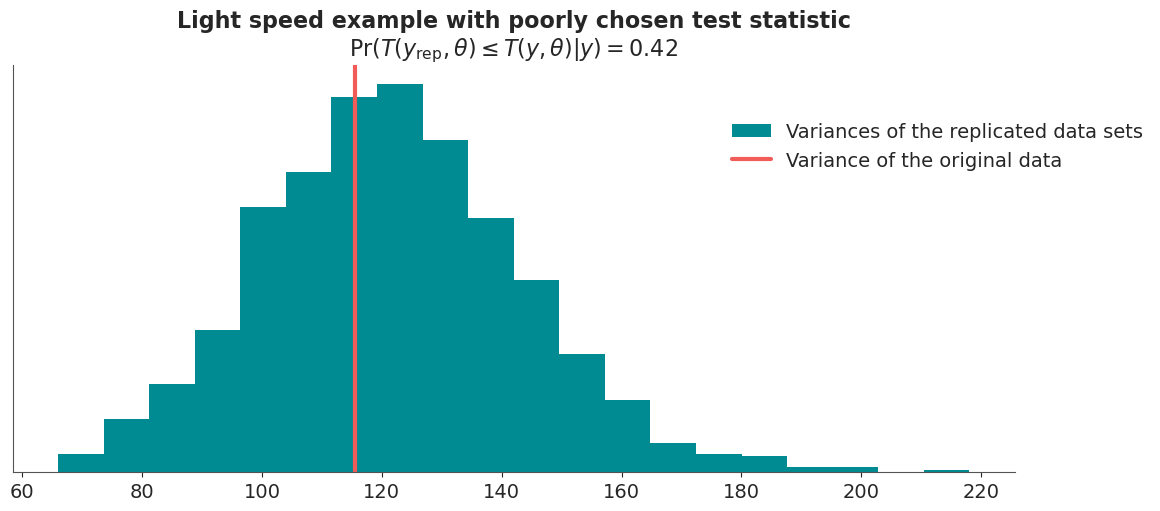

In [5]:
# plot
plt.hist(
    pp,
    20,
    label='Variances of the replicated data sets',
    color='C0',
)
plt.axvline(s2, color='C2', lw=3, label='Variance of the original data')
plt.yticks([])
plt.title(
    'Light speed example with poorly chosen test statistic\n'
    r'$\operatorname{Pr}(T(y_\mathrm{rep},\theta)\leq T(y,\theta)|y)=0.42$',
)
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.8));